<a href="https://colab.research.google.com/github/VIVEKPATIL12/DS_Combined/blob/main/3_sub_Classification_100_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import zipfile

In [3]:
zip_ref = zipfile.ZipFile('/content/All_combined_data_3_cate.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [16]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

classes = [
"asphalt_dry",
"Asphalt_wet",
"Black_Ice",
"cobblestone_dry",
"Cobblestone_wet",
"concrete_dry",
"Concrete_wet",
"dry_mud",
"gravel_dry",
"Gravel_wet",
"Heavy_Snow",
"Heavy_wet",
"Light_Snow",
"Muddy_wet",
"Packed_Snow",
"Refrozen_Ice",
"Sleet",
"Slush" ]


data_dir = '/content/All_combined_data_3_cate'
train_dir = 'vivek/content/train/'
test_dir = 'vivek/content/test/'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    # Create class-specific train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Get a list of all image files for this class
    image_files = os.listdir(os.path.join(data_dir, cls))

    # Split the files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)  # 80% train, 20% test

    # Copy the train files into the train directory
    for file in train_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))

    # Copy the test files into the test directory
    for file in test_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))




In [17]:
# Train the Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import scipy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/vivek/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/vivek/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')




Found 1420 images belonging to 18 classes.
Found 355 images belonging to 18 classes.


In [19]:
# Load the VGG16 network, ensuring the head FC layer sets are left off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))

# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output

headModel = Flatten(name="flatten")(headModel)

headModel = Dense(512, activation="relu")(headModel)

headModel = Dense(18, activation="softmax")(headModel)

# Place the head FC model on top of the base model (this will become the actual model we will train)
model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)

# Loop over all layers in the base model and freeze them so they will not be updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])






In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=[early_stopping, model_checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 541ms/step - accuracy: 0.3593 - loss: 2.1543 - val_accuracy: 0.6789 - val_loss: 1.1088
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.8258 - loss: 0.6459 - val_accuracy: 0.7465 - val_loss: 0.8106
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 398ms/step - accuracy: 0.9238 - loss: 0.3304 - val_accuracy: 0.7549 - val_loss: 0.7518
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.9595 - loss: 0.2414 - val_accuracy: 0.8028 - val_loss: 0.6953
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.9737 - loss: 0.1474 - val_accuracy: 0.7972 - val_loss: 0.6682
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 339ms/step - accuracy: 0.9946 - loss: 0.0888 - val_accuracy: 0.7972 - val_loss: 0.6336
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 338ms/step - accuracy: 0.9926 - loss: 0.0716 - val_accuracy: 0.8000 - val_loss: 0.6246
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - accuracy: 0.9909 - loss: 0.0648 - val_accuracy: 0.797

Found 355 images belonging to 18 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step


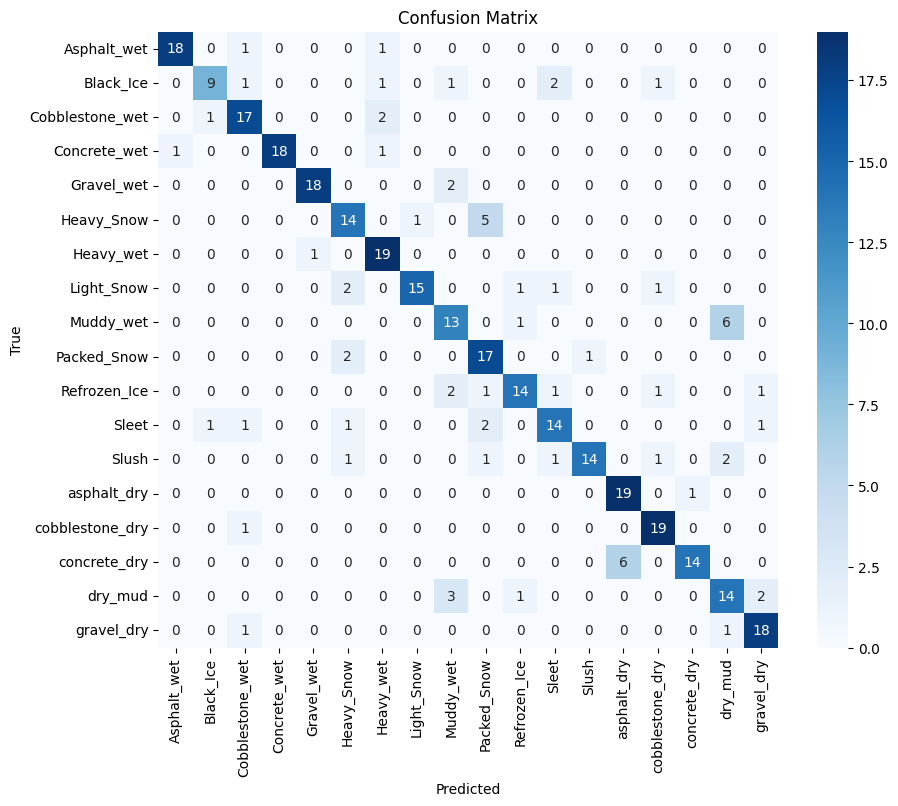

                 precision    recall  f1-score   support

    Asphalt_wet       0.95      0.90      0.92        20
      Black_Ice       0.82      0.60      0.69        15
Cobblestone_wet       0.77      0.85      0.81        20
   Concrete_wet       1.00      0.90      0.95        20
     Gravel_wet       0.95      0.90      0.92        20
     Heavy_Snow       0.70      0.70      0.70        20
      Heavy_wet       0.79      0.95      0.86        20
     Light_Snow       0.94      0.75      0.83        20
      Muddy_wet       0.62      0.65      0.63        20
    Packed_Snow       0.65      0.85      0.74        20
   Refrozen_Ice       0.82      0.70      0.76        20
          Sleet       0.74      0.70      0.72        20
          Slush       0.93      0.70      0.80        20
    asphalt_dry       0.76      0.95      0.84        20
cobblestone_dry       0.83      0.95      0.88        20
   concrete_dry       0.93      0.70      0.80        20
        dry_mud       0.61    

In [21]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/vivek/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [28]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import plotly.express as px

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/vivek/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Convert the confusion matrix to a DataFrame
df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix using Plotly Express as a heatmap
fig = px.imshow(df, text_auto=True, aspect="auto")
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted', yaxis_title='True')
fig.show()



# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 355 images belonging to 18 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step


                 precision    recall  f1-score   support

    Asphalt_wet       0.95      0.90      0.92        20
      Black_Ice       0.82      0.60      0.69        15
Cobblestone_wet       0.77      0.85      0.81        20
   Concrete_wet       1.00      0.90      0.95        20
     Gravel_wet       0.95      0.90      0.92        20
     Heavy_Snow       0.70      0.70      0.70        20
      Heavy_wet       0.79      0.95      0.86        20
     Light_Snow       0.94      0.75      0.83        20
      Muddy_wet       0.62      0.65      0.63        20
    Packed_Snow       0.65      0.85      0.74        20
   Refrozen_Ice       0.82      0.70      0.76        20
          Sleet       0.74      0.70      0.72        20
          Slush       0.93      0.70      0.80        20
    asphalt_dry       0.76      0.95      0.84        20
cobblestone_dry       0.83      0.95      0.88        20
   concrete_dry       0.93      0.70      0.80        20
        dry_mud       0.61    

Found 355 images belonging to 18 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step


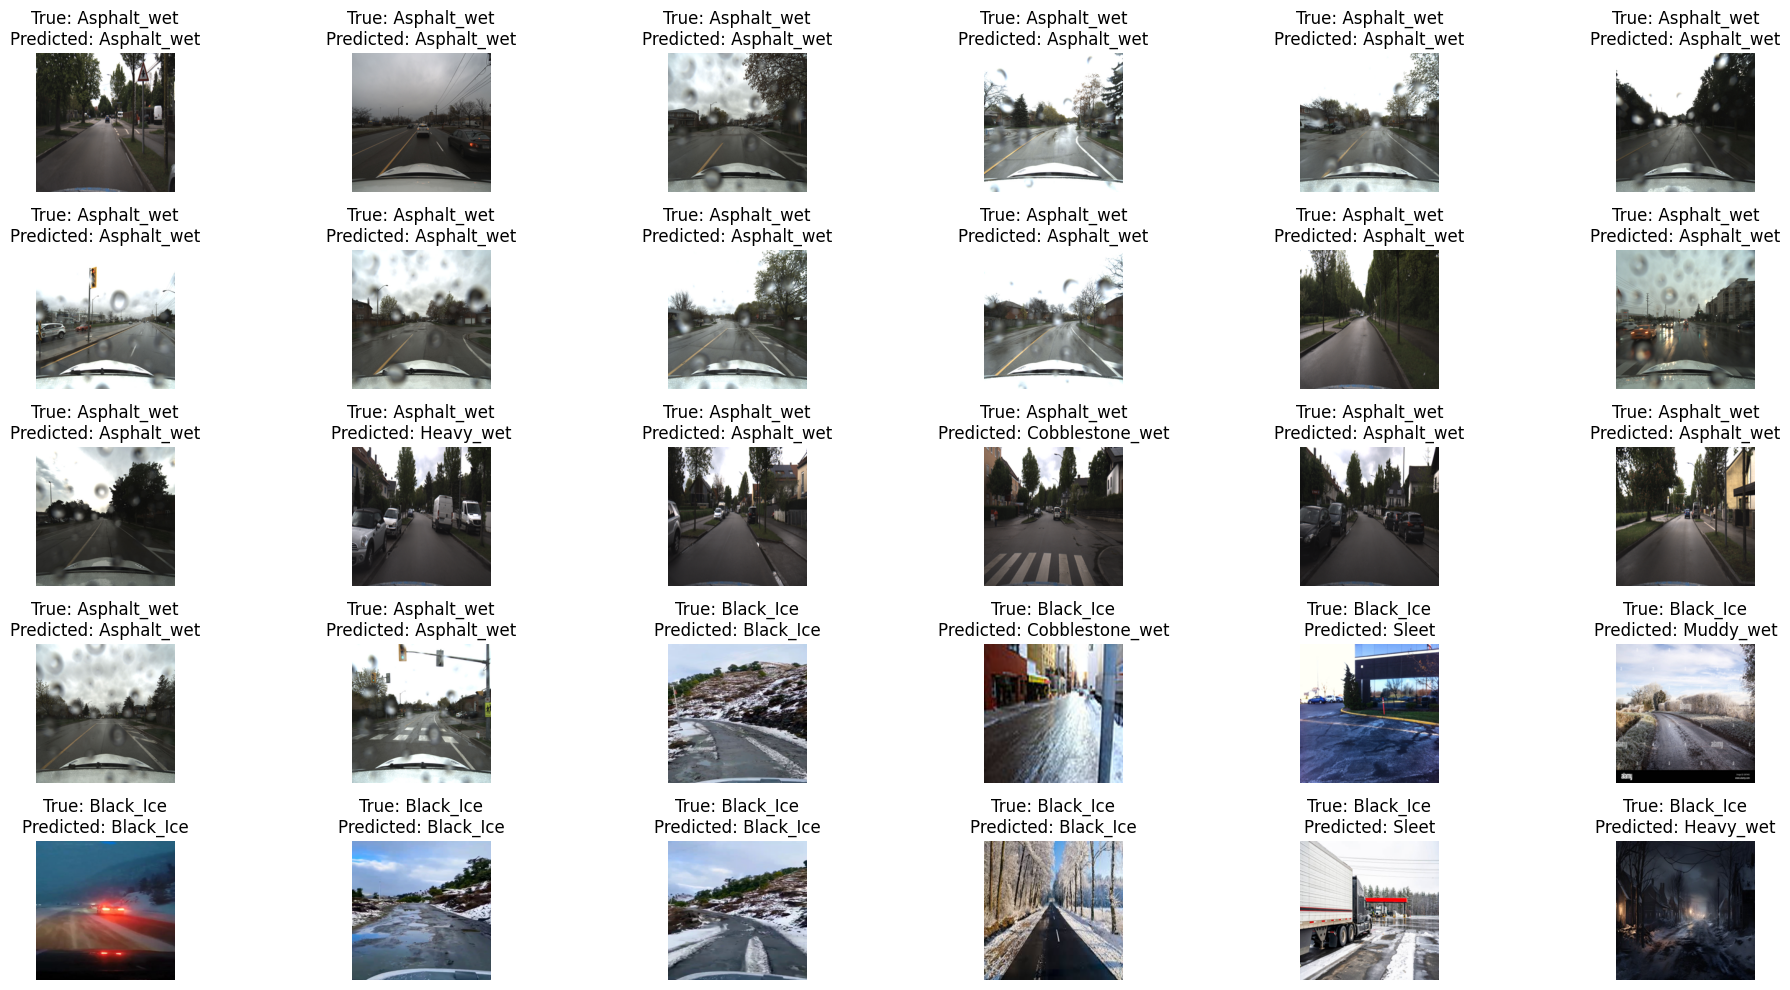

Streaming output truncated to the last 5000 lines.
asphalt_dry : 2.1051183e-06
cobblestone_dry : 1.9774765e-05
concrete_dry : 5.2842474e-06
dry_mud : 3.874888e-05
gravel_dry : 4.243264e-06

True Class: Heavy_wet
Predicted Class: Heavy_wet
Predicted Probabilities:
Asphalt_wet : 0.0105422
Black_Ice : 0.00040627678
Cobblestone_wet : 0.0046414663
Concrete_wet : 0.008319821
Gravel_wet : 0.08149775
Heavy_Snow : 0.0002785544
Heavy_wet : 0.8668805
Light_Snow : 0.0002746771
Muddy_wet : 0.022864882
Packed_Snow : 0.00066304934
Refrozen_Ice : 0.0022291576
Sleet : 0.0005011691
Slush : 0.0004600761
asphalt_dry : 1.43565585e-05
cobblestone_dry : 0.00018466765
concrete_dry : 4.1758474e-05
dry_mud : 0.00016057964
gravel_dry : 3.92089e-05

True Class: Heavy_wet
Predicted Class: Heavy_wet
Predicted Probabilities:
Asphalt_wet : 0.0030417817
Black_Ice : 0.00014910802
Cobblestone_wet : 0.0076023266
Concrete_wet : 0.0021973958
Gravel_wet : 0.021316968
Heavy_Snow : 0.00015011062
Heavy_wet : 0.94245964
Light_S

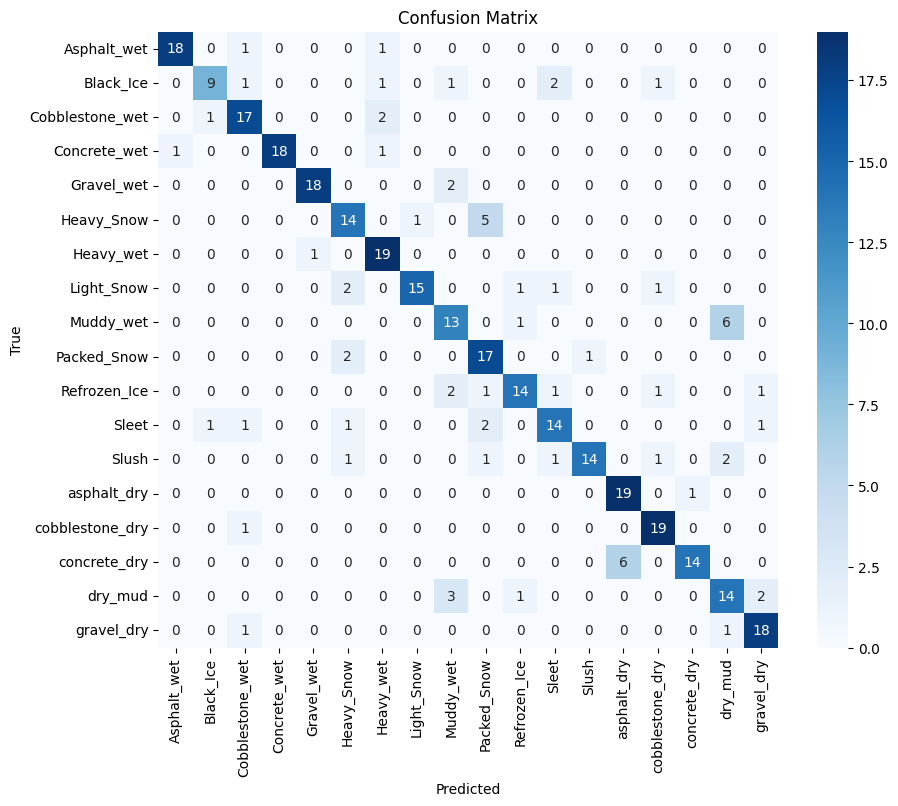

                 precision    recall  f1-score   support

    Asphalt_wet       0.95      0.90      0.92        20
      Black_Ice       0.82      0.60      0.69        15
Cobblestone_wet       0.77      0.85      0.81        20
   Concrete_wet       1.00      0.90      0.95        20
     Gravel_wet       0.95      0.90      0.92        20
     Heavy_Snow       0.70      0.70      0.70        20
      Heavy_wet       0.79      0.95      0.86        20
     Light_Snow       0.94      0.75      0.83        20
      Muddy_wet       0.62      0.65      0.63        20
    Packed_Snow       0.65      0.85      0.74        20
   Refrozen_Ice       0.82      0.70      0.76        20
          Sleet       0.74      0.70      0.72        20
          Slush       0.93      0.70      0.80        20
    asphalt_dry       0.76      0.95      0.84        20
cobblestone_dry       0.83      0.95      0.88        20
   concrete_dry       0.93      0.70      0.80        20
        dry_mud       0.61    

In [22]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/vivek/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the paths of the test images
test_paths = test_generator.filepaths

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predicted probability values for each class
predicted_probabilities = predictions

# Plot images and their predicted probabilities
fig, axs = plt.subplots(5, 6, figsize=(20, 10))
for i in range(min(30, len(true_classes))):
    ax = axs[i // 6, i % 6]
    img_path = test_paths[i]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"True: {class_labels[true_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Print predicted probability values for each class
for i in range(len(true_classes)):
    print("True Class:", class_labels[true_classes[i]])
    print("Predicted Class:", class_labels[predicted_classes[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print(class_labels[j], ":", predicted_probabilities[i][j])
    print()

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 355 images belonging to 18 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step


AttributeError: 'Axes' object has no attribute 'set_table'

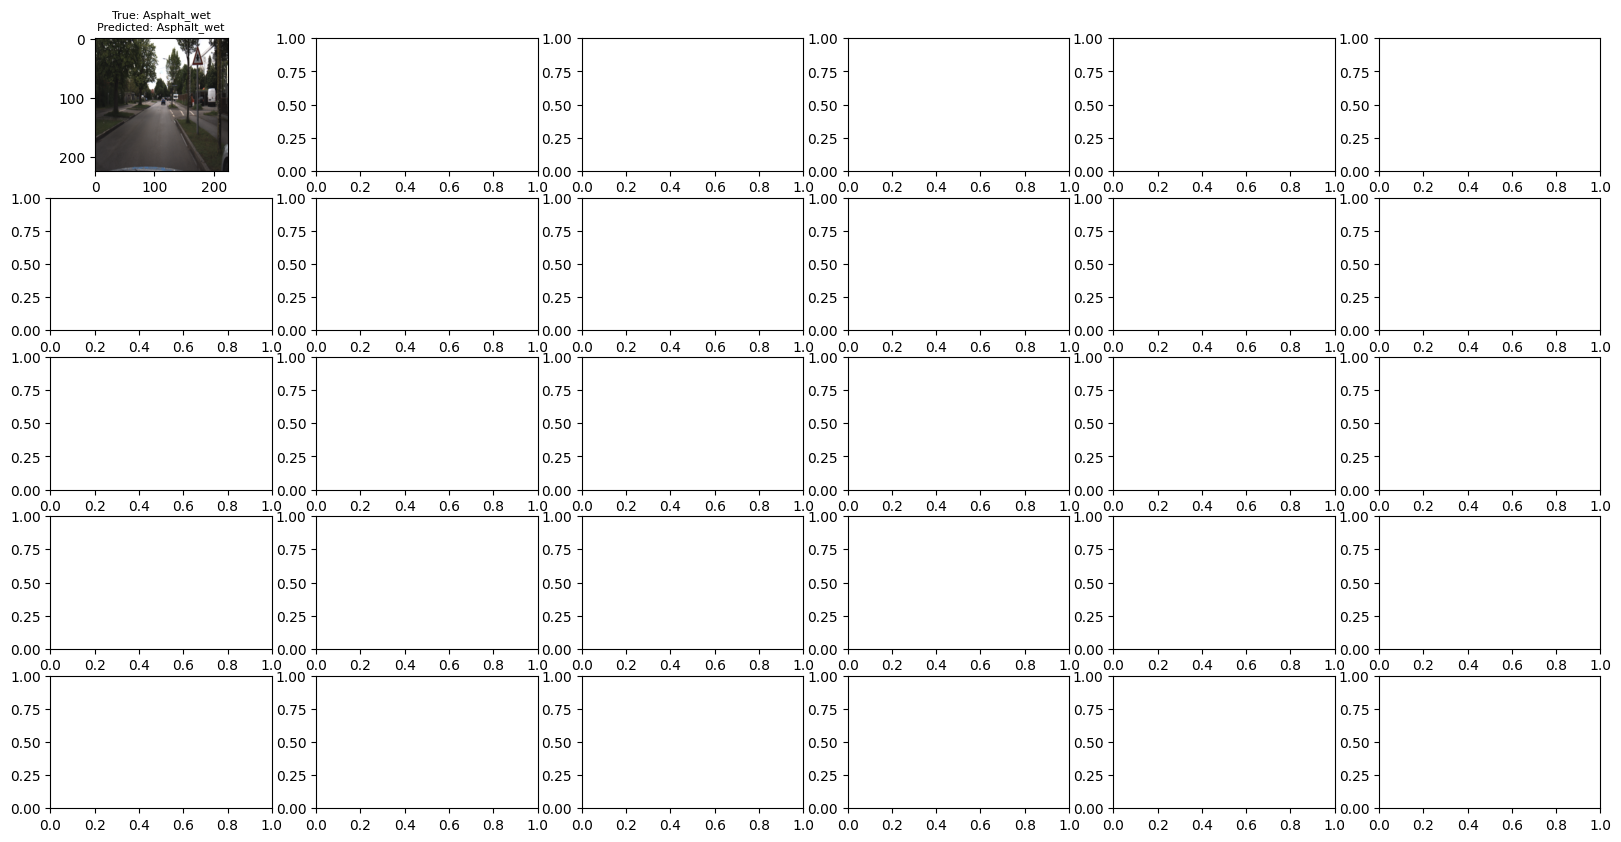

In [29]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    '/content/vivek/content/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the paths of the test images
test_paths = test_generator.filepaths

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Get predicted probability values for each class
predicted_probabilities = predictions

# Plot images and their predicted probabilities
rows = 5
columns = 6
fig, axs = plt.subplots(rows, columns, figsize=(20, 10))
for i in range(min(rows*columns, len(true_classes))):
    ax = axs[i // columns, i % columns]
    img_path = test_paths[i]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"True: {class_labels[true_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}", fontsize=8)

    # Add a table with predicted probabilities
    table_data = [class_labels[j] + ": " + str(round(predicted_probabilities[i][j], 2)) for j in range(len(class_labels))]
    cell_text = [table_data[x:x+3] for x in range(0, len(table_data), 3)]

    # Create a table
    table = ax.table(cellText=cell_text, rowLabels=None, colLabels=None, loc="bottom")
    table.set_fontsize(8)
    table.scale(1, 2)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Print predicted probability values for each class
for i in range(len(true_classes)):
    print("True Class:", class_labels[true_classes[i]])
    print("Predicted Class:", class_labels[predicted_classes[i]])
    print("Predicted Probabilities:")
    for j in range(len(class_labels)):
        print(class_labels[j], ":", predicted_probabilities[i][j])
    print()

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))